# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

In [1]:
#Including the headers
from numpy import * # everything 
import pandas as pd 
%matplotlib inline

In [2]:
#Reading the dataset
df = pd.read_csv('Evidence Dataset.csv', sep=',', error_bad_lines=False)

In [3]:
df.head()

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic


In [4]:
#Doing one hot encoding
dataframe = pd.get_dummies(df, columns=["Ethnicity"])
dataframe.head()

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity_American Indian,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Multi Race,Ethnicity_Native Hawaiian,Ethnicity_Other,Ethnicity_White not Hispanic
0,10210,13 to 17,17,Female,2113,0,0,0,0,0,0,0,1
1,10409,22 to 50,37,Male,41924,0,0,0,0,0,0,0,1
2,10486,0 to 5,3,Male,1454,0,0,0,1,0,0,0,0
3,10538,18 to 21,19,Female,6400,0,0,0,1,0,0,0,0
4,10568,13 to 17,13,Male,4412,0,0,0,0,0,0,0,1


We have prepared the dataset for our analysis. The one hot encoding allows us to fetch values for our requirement

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

In [5]:
#Average Expenditures on Hispanic Residents
hispanic_df = dataframe[dataframe['Ethnicity_Hispanic'] == 1]
hispanic_exp_mean = hispanic_df['Expenditures'].mean()
hispanic_df.head()

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity_American Indian,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Multi Race,Ethnicity_Native Hawaiian,Ethnicity_Other,Ethnicity_White not Hispanic
2,10486,0 to 5,3,Male,1454,0,0,0,1,0,0,0,0
3,10538,18 to 21,19,Female,6400,0,0,0,1,0,0,0,0
5,10690,13 to 17,15,Female,4566,0,0,0,1,0,0,0,0
9,10823,13 to 17,13,Male,2887,0,0,0,1,0,0,0,0
11,11024,13 to 17,14,Male,3048,0,0,0,1,0,0,0,0


In [6]:
#Average Expenditures on White (non-Hispanic) Residents
white_df = dataframe[dataframe['Ethnicity_White not Hispanic'] == 1]
white_exp_mean = white_df['Expenditures'].mean()
white_df.head()

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity_American Indian,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Multi Race,Ethnicity_Native Hawaiian,Ethnicity_Other,Ethnicity_White not Hispanic
0,10210,13 to 17,17,Female,2113,0,0,0,0,0,0,0,1
1,10409,22 to 50,37,Male,41924,0,0,0,0,0,0,0,1
4,10568,13 to 17,13,Male,4412,0,0,0,0,0,0,0,1
6,10711,13 to 17,13,Female,3915,0,0,0,0,0,0,0,1
8,10820,13 to 17,14,Female,5021,0,0,0,0,0,0,0,1


[Text(0, 0, 'Hipanic'), Text(1, 0, 'White (non-Hispanic)')]

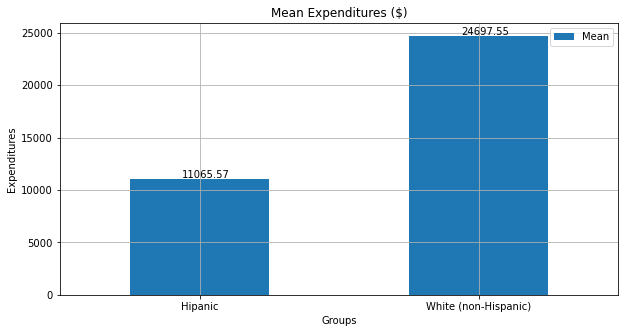

In [7]:
#Plotting the information
Mean = [hispanic_exp_mean, white_exp_mean]
plotdata = pd.DataFrame({'Mean' : Mean})
ax = plotdata.plot(kind = 'bar',
                           grid = True,
                           legend = True,
                           figsize = (10, 5),
                           title = 'Mean Expenditures ($)')
for i, v in enumerate(Mean):
    ax.text(i - 0.0625, v + 100, str(round(v, 2)))
ax.set_xlabel('Groups')
ax.set_ylabel('Expenditures')
ax.set_xticklabels(labels = ['Hipanic', 'White (non-Hispanic)'], rotation = 360)

From the above graph we can say that the mean expense on Hispanic people is very less compared to white people. There is ***atleast 100% more*** spent on white people.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

In [8]:
#Finding all the unique values 
age_values = sort(df['Age Cohort'].unique())
print("Possible Age Cohorts : ", age_values)

Possible Age Cohorts :  ['0 to 5' '13 to 17' '18 to 21' '22 to 50' '51+' '6 to 12']


In [9]:
#Finding the Hispanic mean of all the combinations
hispanic_means = hispanic_df.groupby(['Age Cohort'])['Expenditures'].mean()
print(hispanic_means)

Age Cohort
0 to 5       1393.204545
13 to 17     3955.281553
18 to 21     9959.846154
22 to 50    40924.116279
51+         55585.000000
6 to 12      2312.186813
Name: Expenditures, dtype: float64


In [10]:
#Finding the White mean of all the combinations
white_means = white_df.groupby(['Age Cohort'])['Expenditures'].mean()
print(white_means)

Age Cohort
0 to 5       1366.900000
13 to 17     3904.358209
18 to 21    10133.057971
22 to 50    40187.624060
51+         52670.424242
6 to 12      2052.260870
Name: Expenditures, dtype: float64


[Text(0, 0, '0 to 5'),
 Text(1, 0, '13 to 17'),
 Text(2, 0, '18 to 21'),
 Text(3, 0, '22 to 50'),
 Text(4, 0, '51+'),
 Text(5, 0, '6 to 12')]

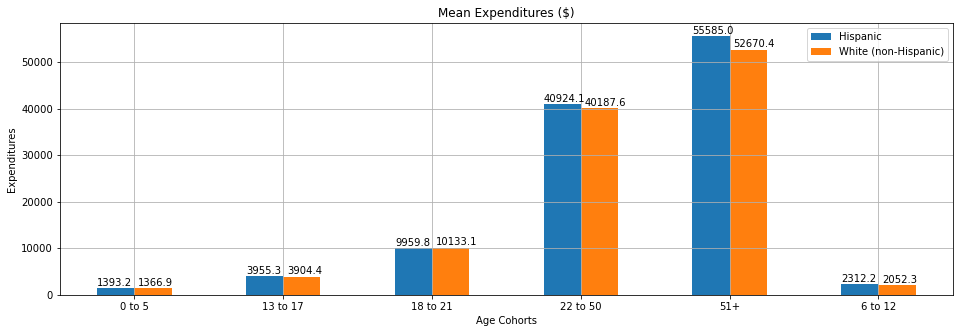

In [11]:
#Plotting the information
plotdata = pd.DataFrame({'Hispanic' : hispanic_means, 'White (non-Hispanic)' : white_means})
ax = plotdata.plot(kind = 'bar',
                           grid = True,
                           legend = True,
                           figsize = (16, 5),
                           title = 'Mean Expenditures ($)')
for i, v in enumerate(hispanic_means):
    ax.text(i - 0.250, v + 500, str(round(v, 1)))
for i, v in enumerate(white_means):
    ax.text(i + 0.025, v + 500, str(round(v, 1)))
ax.set_xlabel('Age Cohorts')
ax.set_ylabel('Expenditures')
ax.set_xticklabels(labels = age_values, rotation = 360)

From the above graph we can infer that, The mean of expenditures of DDS spending on both hispanic and whites are ***almost equal***. However this ***contradicts*** with the previous graph in which we concluded that DDS spends ***atleast 100% more on whites compared to hispanic.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

The contradiction occurs because we are looking at the mean instead of the sheer values. ***Yes, the average spending is same but the number of spendings on whites are more than hispanics***. This causes the discrimination. Let's dive deeper!

In [12]:
#Finding the Hispanic count of all the combinations
hispanic_count = hispanic_df.groupby(['Age Cohort'])['Expenditures'].count()
print(hispanic_count)

Age Cohort
0 to 5       44
13 to 17    103
18 to 21     78
22 to 50     43
51+          17
6 to 12      91
Name: Expenditures, dtype: int64


In [13]:
#Finding the White count of all the combinations
white_count = white_df.groupby(['Age Cohort'])['Expenditures'].count()
print(white_count)

Age Cohort
0 to 5       20
13 to 17     67
18 to 21     69
22 to 50    133
51+          66
6 to 12      46
Name: Expenditures, dtype: int64


[Text(0, 0, '0 to 5'),
 Text(1, 0, '13 to 17'),
 Text(2, 0, '18 to 21'),
 Text(3, 0, '22 to 50'),
 Text(4, 0, '51+'),
 Text(5, 0, '6 to 12')]

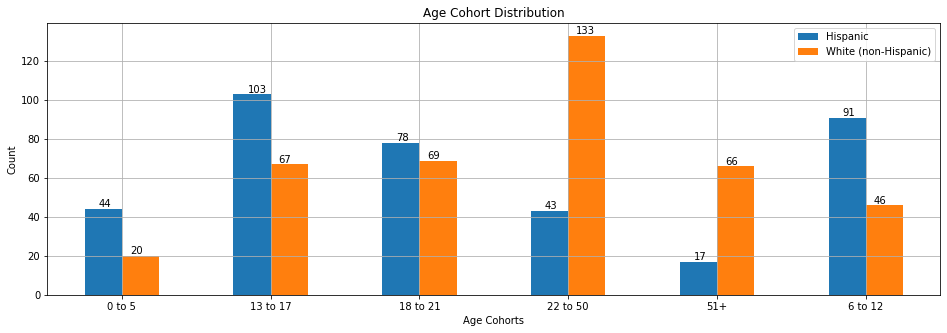

In [14]:
#Plotting the information
plotdata = pd.DataFrame({'Hispanic' : hispanic_count, 'White (non-Hispanic)' : white_count})
ax = plotdata.plot(kind = 'bar',
                           grid = True,
                           legend = True,
                           figsize = (16, 5),
                           title = 'Age Cohort Distribution')
for i, v in enumerate(hispanic_count):
    ax.text(i - 0.155, v + 1, str(round(v, 1)))
for i, v in enumerate(white_count):
    ax.text(i + 0.055, v + 1, str(round(v, 1)))
ax.set_xlabel('Age Cohorts')
ax.set_ylabel('Count')
ax.set_xticklabels(labels = age_values, rotation = 360)

[Text(0, 0, '0 to 5'),
 Text(1, 0, '13 to 17'),
 Text(2, 0, '18 to 21'),
 Text(3, 0, '22 to 50'),
 Text(4, 0, '51+'),
 Text(5, 0, '6 to 12')]

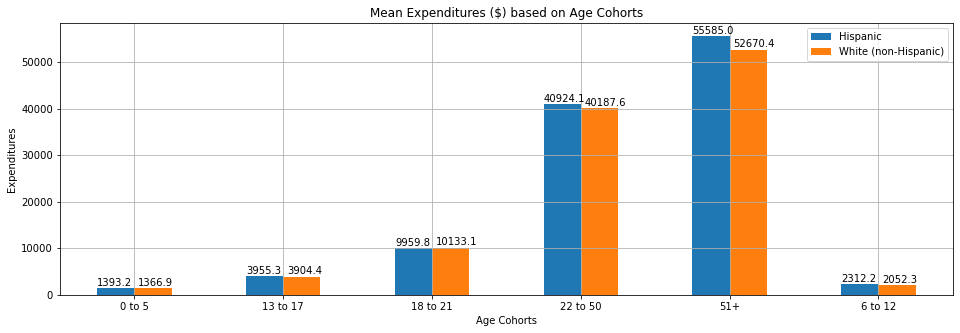

In [15]:
#Plotting the information
plotdata = pd.DataFrame({'Hispanic' : hispanic_means, 'White (non-Hispanic)' : white_means})
ax = plotdata.plot(kind = 'bar',
                           grid = True,
                           legend = True,
                           figsize = (16, 5),
                           title = 'Mean Expenditures ($) based on Age Cohorts')
for i, v in enumerate(hispanic_means):
    ax.text(i - 0.250, v + 500, str(round(v, 1)))
for i, v in enumerate(white_means):
    ax.text(i + 0.025, v + 500, str(round(v, 1)))
ax.set_xlabel('Age Cohorts')
ax.set_ylabel('Expenditures')
ax.set_xticklabels(labels = age_values, rotation = 360)

At the start, we were able to identify the descrimination using simple mean analysis. But we did not identify the cause of this descrimination. On further analysis, we can identify the ***number of expenditures on whites are more than hispanics***. 

Now to further break it down, we were able to find a pattern, From the above mean expenditures graph we can infer that ***DDS spent most on people above the age 22 (alteast four/five times)***. 

Then, with the help of age distribution graph we can identify that ***DDS chose more white people than hispanic above the age of 22 to spend on***. 

This age distribution coupled with the mean expense, we can pinpoint the ***cause of discrimination!***

## Submission Instructions

- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "Lab 1B - Evidence of Discrimination - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you and your partner (if you worked with one).
- Demo lab to TA and upload to eLearn. 